<a href="https://colab.research.google.com/github/HIDAN122/HIDAN122/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторна робота №4**

**Тема:** “Реалізація методу градієнтного спуску”

**Мета:** Нехай ми маємо деяку функцію. Нам потрібно знайти її глобальний мінімум з
використанням методу градієнтного спуску та дослідити результати методу відповідно
до різних параметрів alpha, eps.


In [ ]:
from matplotlib import pylab as plt
import pandas as pd
from scipy.misc import derivative

Побудувати графік функції (функцію обераємо самостійно).

In [ ]:
def f(x):
    return (x + 30)**2 + 40

Знаходимо похідну за допомогою скінченних різниць, а для тестування
використовуємо бібліотеку “derivative”.

In [ ]:
def df(x):
    eps = 10e-11
    return (f(x + eps) - f(x)) / eps

def std_df(x):
    return derivative(f, x, dx=10e-11)

der_custom = df(0)
der_lib = std_df(0)
print(f"custom = {der_custom}")
print(f"std lib = {der_lib}")

custom = 59.999365475960076
std lib = 59.999365475960076


Реалізація градієнтного спуску для пошуку глобального мінімуму функції.

In [ ]:
def compute_gradient_descent(alpha, eps, epoch, derivative): 
  x_prev = 0
  y_prev = f(x_prev)
  Y = { x_prev: y_prev}
  for _ in range(epoch):
      # derivative - tan angle
      # alpha - learning rate
      x_new = x_prev - alpha * derivative(x_prev)
      
      y_new = f(x_new) 
      Y[x_new] = y_new

      if abs(x_new - x_prev) <= eps: 
          return Y

      x_prev = x_new 
  return Y;

Виведення результату (глобального мінімуму) градієнтного спуску.

In [ ]:
gradient = compute_gradient_descent(0.2, 10e-6, 10000, df) 
actual_iteration = len(gradient)
print(f"actual_iteration = {actual_iteration}")
table = pd.DataFrame(gradient.items(), columns=["x", "y"]) 
print(table)
result = table.tail(1) 
print(f"\nGlobal minimum:\n{result}")

actual_iteration = 29
            x           y
0    0.000000  940.000000
1  -11.999873  364.004569
2  -19.200115  156.637510
3  -23.519988   81.990559
4  -26.111934   55.117058
5  -27.667127   45.442295
6  -28.600255   41.959287
7  -29.160134   40.705375
8  -29.496064   40.253951
9  -29.697631   40.091427
10 -29.818580   40.032913
11 -29.891140   40.011850
12 -29.934682   40.004266
13 -29.960802   40.001536
14 -29.976491   40.000553
15 -29.985898   40.000199
16 -29.991540   40.000072
17 -29.994922   40.000026
18 -29.996954   40.000009
19 -29.998176   40.000003
20 -29.998901   40.000001
21 -29.999342   40.000000
22 -29.999612   40.000000
23 -29.999768   40.000000
24 -29.999853   40.000000
25 -29.999910   40.000000
26 -29.999939   40.000000
27 -29.999967   40.000000
28 -29.999981   40.000000

Global minimum:
            x     y
28 -29.999981  40.0


Візуалізація результу градієнтного спуску на графіку та візуалізація локального мінімуму у вигляді маркера.

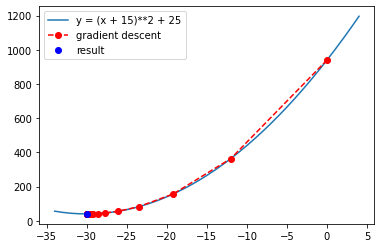

In [ ]:
x = list(gradient.keys())
y = list(gradient.values())
f_x = range(int(min(x[0], x[-1])) - 5, int(max(x[0], x[-1])) + 5)
f_y = [f(xn) for xn in f_x]
plt.plot(f_x, f_y, x, y, 'ro--', result['x'], result['y'],'bo') 
plt.legend(['y = (x + 15)**2 + 25', 'gradient descent', 'result'])
plt.show()

Тестування методу (підбір параметрів: alpha, eps; порівняння результатів пошуку похідної функції реалізованої з використанням скінченних різниць та бібліотеки) та аналіз результатів методу градієнтного спуску.

In [ ]:
def testAlphaEps(alpha, eps):
    gradient = compute_gradient_descent(alpha, eps, epoch=10000, derivative=df)
    x = list(gradient.keys())[-1]
    y = gradient[x]
    print(f"\nGlobal minimum for alpha = {alpha}, eps = {eps}, iterations = {len(gradient)}:")
    print(f" custom dx: x = {x}, y = {y}")
    std_gradient = compute_gradient_descent(alpha, eps, epoch=10000, derivative=std_df)
    std_x = list(std_gradient.keys())[-1]
    std_y = std_gradient[std_x]
    print(f" stdlib dx: x = {std_x}, y = {std_y}")
    print(f" delta std - custom = {abs(std_y - y):0.10f}")

Змінюємо alpha для порівняння результатів

In [ ]:
testAlphaEps(0.2, 10e-3)
testAlphaEps(0.02, 10e-3)
testAlphaEps(0.002, 10e-3)


Global minimum for alpha = 0.2, eps = 0.01, iterations = 16:
 custom dx: x = -29.985898208906292, y = 40.00019886051205
 stdlib dx: x = -29.985898208906292, y = 40.00019886051205
 delta std - custom = 0.0000000000

Global minimum for alpha = 0.02, eps = 0.01, iterations = 120:
 custom dx: x = -29.766962938992947, y = 40.05430627180281
 stdlib dx: x = -29.766961517907475, y = 40.05430693413599
 delta std - custom = 0.0000006623

Global minimum for alpha = 0.002, eps = 0.01, iterations = 622:
 custom dx: x = -27.510115785389644, y = 46.19952340216583
 stdlib dx: x = -27.51011891177768, y = 46.19950783348716
 delta std - custom = 0.0000155687


Змінюємо eps для порівняння результатів

In [ ]:
testAlphaEps(0.2, 10e-3)
testAlphaEps(0.2, 10e-4)
testAlphaEps(0.2, 10e-5)
testAlphaEps(0.2, 10e-9)


Global minimum for alpha = 0.2, eps = 0.01, iterations = 16:
 custom dx: x = -29.985898208906292, y = 40.00019886051205
 stdlib dx: x = -29.985898208906292, y = 40.00019886051205
 delta std - custom = 0.0000000000

Global minimum for alpha = 0.2, eps = 0.001, iterations = 21:
 custom dx: x = -29.998901140970702, y = 40.00000120749117
 stdlib dx: x = -29.998901140970702, y = 40.00000120749117
 delta std - custom = 0.0000000000

Global minimum for alpha = 0.2, eps = 0.0001, iterations = 25:
 custom dx: x = -29.99985326823662, y = 40.00000002153021
 stdlib dx: x = -29.999860373663978, y = 40.000000019495516
 delta std - custom = 0.0000000020

Global minimum for alpha = 0.2, eps = 1e-08, iterations = 29:
 custom dx: x = -29.999981165929057, y = 40.000000000354724
 stdlib dx: x = -29.999988271356415, y = 40.00000000013756
 delta std - custom = 0.0000000002


**Висновок:** На даній лабораторній роботі ознайомився з методом градієнтного спуску та дослідив результати методу відповідно з різними параметрами alpha, eps та похідної. А також провів спостереження між звичною похідною з eps=10e-11 та стандартною, різниця є незначна. Але при обох однакових eps, то похідна не зміниться. Сама derivative за замовчуванням має dx=1, але якщо ми будемо прописувати такий  eps в нашому методі скінченних різниць, то вийде помилка. 